## Chapter 12 - Multilevel Models

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

from scipy.special import expit

%matplotlib inline

### 12.1 Example: Multulevel tadpoles

In [18]:
df = pd.read_csv('data/reedfrogs.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
density     48 non-null int64
pred        48 non-null object
size        48 non-null object
surv        48 non-null int64
propsurv    48 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ KB


In [24]:
df.head(10)

,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9
5,10,no,small,9,0.9
6,10,no,small,10,1.0
7,10,no,small,9,0.9
8,10,pred,big,4,0.4
9,10,pred,big,9,0.9


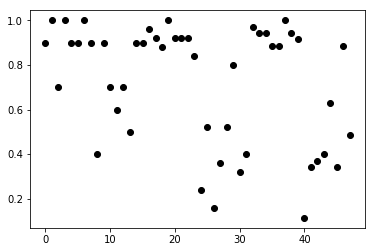

In [19]:
plt.plot(df.propsurv, 'ko');

#### Model definition

In [151]:
with pm.Model() as multilevel_tadpoles:
    
    alpha = pm.Normal('alpha', 0, 1)
    sigma = pm.HalfCauchy('sigma', 1)
    
    alpha_tank = pm.Normal('alpha_tank', alpha, sigma, shape=df.index.size)
    
    like = pm.Binomial('like',
                       n=df.density.as_matrix(),
                       p=pm.invlogit(alpha_tank),
                       observed=df.surv)        

In [117]:
with multilevel_tadpoles:
    trace = pm.sample(4000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 138.66: 100%|██████████| 200000/200000 [00:25<00:00, 7708.29it/s]
Finished [100%]: Average Loss = 138.66
100%|██████████| 4500/4500 [00:06<00:00, 709.90it/s]


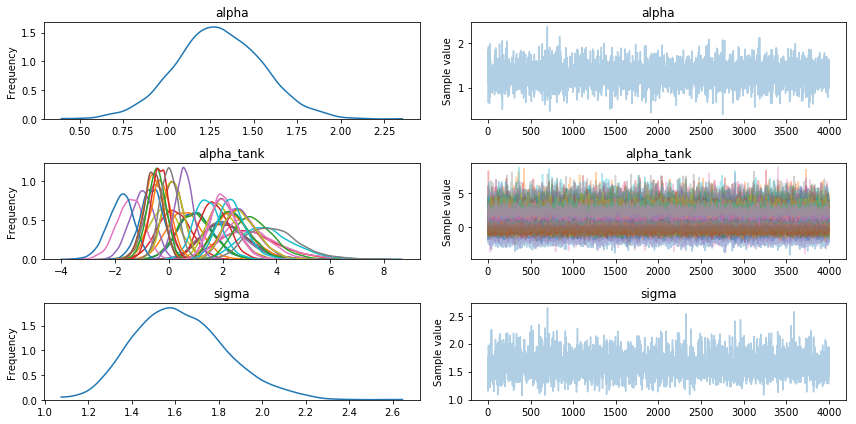

In [118]:
pm.traceplot(trace);

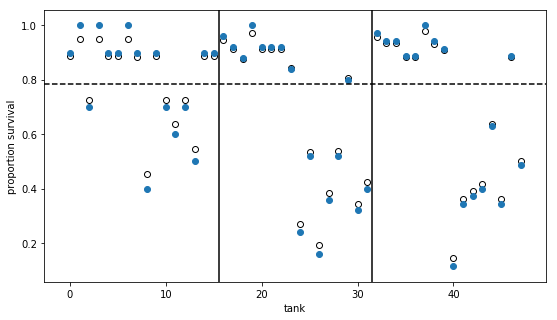

In [149]:
plt.figure(figsize=(9,5))
plt.scatter(df.index, df.propsurv)
plt.scatter(df.index, expit(np.median(trace['alpha_tank'], axis=0)), facecolors='w', edgecolor='k', zorder=0)

plt.axhline(y=expit(np.median(trace['alpha'])), ls='dashed', color='k')
for x in [15.5, 31.5]:
    plt.axvline(x=x, color='k')

plt.xlabel('tank')
plt.ylabel('proportion survival');